In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.experiments import *
from LIMxCMBL.kernels import *

/home/users/delon/.local/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [2]:
import matplotlib.pyplot as plt

In [3]:
k = np.logspace(-5, 3, 2**10)
pk_lin = ccl.linear_matter_power(cosmo, k, 1)
pk_nonlin = ccl.nonlin_matter_power(cosmo, k, 1)

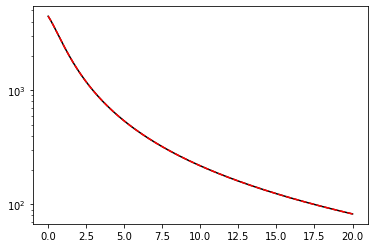

In [4]:
from scipy.interpolate import interp1d
dchidz = np.gradient(chis, zs)
f_dchidz = interp1d(x = zs, y = dchidz)

plt.plot(zs, dchidz, c='k')
plt.plot(zs, f_dchidz(zs), 'r--')
plt.yscale('log')

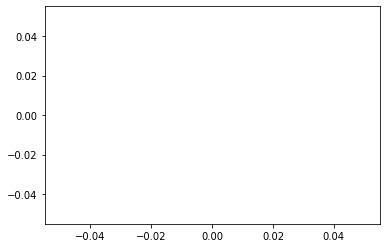

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors

plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 10,
    "font.family" : "serif",
    'figure.constrained_layout.use':True,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'hatch.linewidth':0.1,
    'figure.figsize': (6, 6/1.618),
    'figure.constrained_layout.use': False,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
})

In [6]:
2*np.pi * np.fft.rfftfreq(n=len(zs), d=np.mean(np.diff(chis)))

array([0.00000000e+00, 5.72772440e-04, 1.14554488e-03, ...,
       2.86271665e+00, 2.86328943e+00, 2.86386220e+00])

In [7]:
2*np.pi/(np.max(chis) - np.min(chis))

0.0005728297225182396

In [8]:
np.pi/(np.mean(np.diff(chis)))

2.863862197729939

In [9]:
KIs={
    'CCAT-prime': KI,
    'COMAP': KI_CO,
    'HETDEX': KI_Lya,
    'SPHEREx': KI_Lya,
    'CHIME': KI_HI
}

In [10]:
import matplotlib.ticker as mticker

In [11]:
import matplotlib.transforms as transforms

In [12]:
def hline_text(x, y, text, color="k", fontsize=12, linestyle="-", ax=None,
              left = None, right = None, path_effects = None, ha='right', lw=1,
              pad = .01, bookends=True):
    """ draw hline at y interrupted by text at x """
    if ax is None:
        ax = plt.gca()
    text += ' '
    text = ' ' + text
    label = ax.text(x, y, text, color='k', fontsize=fontsize,
                    va="center", ha=ha,
                   path_effects= path_effects)
    # draw text to get its bounding box
    ax.get_figure().canvas.draw()
    bbox = label.get_window_extent().transformed(ax.transAxes.inverted())
    bbox.x0 -= pad
    bbox.x1 += pad
    bbox = bbox.transformed(ax.transAxes).transformed(ax.transData.inverted())
    # add hlines next to bounding box
    if(left == None):
        left, right = ax.get_xlim()
    ax.hlines([y]*2, [left, bbox.x1], [bbox.x0, right], color=color, linestyle=linestyle, lw=lw)
    
    
    if(bookends):
        y0, y1 = bbox.y0, bbox.y1
        dy = (y1 - y0)
        yb = (y0 + y1)/2
        ax.plot([left, left], [y-dy/5, y+dy/5], color=color, lw=lw)
        ax.plot([right, right], [y-dy/5, y+dy/5], color=color, lw=lw)

In [13]:
kper_ys = np.array([3e2, 8e2, 1e5, 8e6, 13e2])/1e6
kpar_ys = np.array([9e2, 24e2, 3e5, 1e8, 39e2])/1e6 * 1.5
# kpar_ys[-1] = 8e-1

In [14]:
import matplotlib.patheffects as pe

In [15]:
e_order = ['CHIME',
          'HETDEX',
          'COMAP',
          'CCAT-prime',
          'SPHEREx']

In [16]:
experiments

{'CCAT-prime': {'line_str': 'CII',
  'zmin': 3.5,
  'zmax': 8.1,
  'Omega_field': <Quantity 0.00243694 rad2>,
  'Omega_pix': <Quantity 162.3031921 arcsec2>,
  'R': 100,
  'f_Pei': <function LIMxCMBL.experiments.CCAT_prime_Pei()>},
 'COMAP': {'line_str': 'CO',
  'zmin': 2.4,
  'zmax': 3.4,
  'Omega_field': <Quantity 0.00365541 rad2>,
  'Omega_pix': <Quantity 3.65182182 arcmin2>,
  'R': 800,
  'f_Pei': <function LIMxCMBL.experiments.COMAP_Pei(Omega_field=<Quantity 0.00365541 rad2>, Tsys=<Quantity 40. K>, tsurvey=<Quantity 5000. h>, Nfeeds=19)>},
 'SPHEREx': {'line_str': 'Lya',
  'zmin': 5.2,
  'zmax': 8.0,
  'Omega_field': <Quantity 0.06092348 rad2>,
  'Omega_pix': <Quantity 36. arcsec2>,
  'R': 41,
  'f_Pei': <function LIMxCMBL.experiments.SPHEREx_Pei(Omegapix=<Quantity 36. arcsec2>, R=41, Omegasurv=<Quantity 0.06092348 rad2>, mAB5Sigma=22, nPixEff=2.0)>},
 'HETDEX': {'line_str': 'Lya',
  'zmin': 1.9,
  'zmax': 3.5,
  'Omega_field': <Quantity 0.16449341 rad2>,
  'Omega_pix': <Quantity 9

In [17]:
# fig, axs = plt.subplots(nrows = len(experiments), ncols = 1, sharex = True, 
#                        figsize=(7, 8),
#                        facecolor='w', dpi=300)

# for i,experiment in enumerate(e_order):
        
#     ax = axs[i]
#     trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

#     #load configuration of experiment
#     zmin = experiments[experiment]['zmin']
#     zmax = experiments[experiment]['zmax']
#     zcentral = (zmin + zmax)/2

#     line_str = experiments[experiment]['line_str']

#     chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
#     chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
#     chicentral = ccl.comoving_angular_distance(cosmo, 1/(1+zcentral))



#     #kperp min max with central chi
#     ell_fundamental = np.sqrt((2*np.pi)**2 / experiments[experiment]['Omega_field'].to(u.rad**2))
#     ell_fundamental = np.array(ell_fundamental)

#     ell_max_survey = np.sqrt((np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2))
#     ell_max_survey = np.array(ell_max_survey)

#     kperp_min = ell_fundamental/chicentral #1/Mpc
#     kperp_max = ell_max_survey/chicentral  #1/Mpc

    
#     ax.fill_between([kperp_min, kperp_max], 
#                      [0, 0], 
#                      [1e100, 1e100], 
#                      linewidth=0.0,
#                      alpha = 0.3,
#                      facecolor='yellow',)



#     #kpar min max with resolving factor 
#     R = experiments[experiment]['R']
#     dchi_central = (1+zcentral) / R * f_dchidz(zcentral)

#     kpar_fundamental = 2*np.pi/(chimax - chimin)
#     kpar_max_survey = np.pi / dchi_central

    

#     ax.fill_between([kpar_fundamental, kpar_max_survey], 
#                      [0, 0], 
#                      [1e100, 1e100], 
#                      linewidth=0,
#                      alpha = 0.3,
#                      facecolor='cyan', )
    


#     #plot P3D LIM
#     ax.tick_params(axis='both', which='both', direction='in')

#     if(line_str == 'Lya'):
#         line_str = r'Ly-$\alpha$'
#     if(line_str == 'CO'):
#         line_str = r'CO(1$\rightarrow$ 0)'

#     idxs = [np.argmin(np.abs(zs - zmin)),
#             np.argmin(np.abs(zs - zmax))]
#     colors = ['b', 'r']

#     for idx,c in zip(idxs, colors):
#         z = zs[idx]
#         ax.plot(k, (KIs[experiment][idx].to(u.kJy/u.sr))**2 * pk_lin, 
#                  c = c,
#                  label=r'$z=%.1f$'%(z))
# #         ax.plot(k, (KIs[experiment][idx].to(u.kJy/u.sr))**2 * pk_nonlin, 
# #                  c = c,
# #                  ls='--')
#     ax.set_yscale('log')
#     ax.set_xscale('log')


#     #instrumentla noise
#     _, _b = Pei_dict[experiment]() 
#     print(experiment)
#     _b = np.array(_b.to((u.kJy/u.sr)**2 * u.Mpc**3)) 
#     Pei = np.max(_b)



#     #figure config
#     leg = ax.legend(frameon=False, ncols = 2, 
#                     bbox_to_anchor=(0., 0.97, 1., .5),
#                     borderaxespad=0.,
#                     loc = 'lower right',
#                     bbox_transform=ax.transAxes,
#                     fontsize = 10,)
    
#     ax.text(1.01, 0.5, r'\textsf{\textbf{%s}}'%(experiment), 
#             transform=ax.transAxes, 
#             ha='left', va='center',
#             rotation=-90)
    
#     if(line_str != 'CII'):
#         ax.text(1-0.01, 0.08, r'%s'%(line_str), 
#                 transform=ax.transAxes, 
#                 fontsize = 10,
#                 ha='right', va='bottom',)
#     else:
#         ax.text(1-0.01, 0.08, r'[%s]'%(line_str), 
#                 transform=ax.transAxes, 
#                 fontsize = 10,
#                 ha='right', va='bottom',)

    
#     xleft = 3e-4
#     xright = 1e2
#     plotted_idxs = np.where((k <= xright) & (k>=xleft))


#     yhigh = 3*max(np.array(np.max((KIs[experiment][idxs[0]].to(u.kJy/u.sr))**2  * pk_lin[plotted_idxs])), Pei)
#     ax.set_xlim(xleft, xright)
#     ax.set_ylim(yhigh/2**15, yhigh)
#     ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999,))
#     # ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs='all'))    
    
    
#     _x = np.sqrt(kperp_min * kperp_max)
#     _x2 = np.sqrt(kpar_fundamental * kpar_max_survey)

#     _ha = 'center'
#     # if(experiment == 'HETDEX' or experiment == 'SPHEREx'):
#     #     _ha = 'left'
        
#     if(experiment == 'HETDEX'):
#         _x = _x2
        
        
#     if(experiment == 'SPHEREx'):
#         _x = _x2

#     hline_text(x = _x, 
#                y=kper_ys[i],  text=r'$k_\perp$ {\sf probed}',
#               color='k', fontsize=10, linestyle='-', ax=ax, 
#               left = kperp_min, right=kperp_max,
#               ha = _ha, lw=0.5, pad=0.005)

    
#     hline_text(x = _x2, 
#                y=kpar_ys[i],  text=r'$k_\parallel$ {\sf probed}',
#               color='k', fontsize=10, linestyle='-', ax=ax, 
#               left = kpar_fundamental, right=kpar_max_survey,
#               ha = _ha, lw=0.5, pad=0.005)
#     hline_text(x = 5e1, y=Pei,  text=r'{\sf Instrumental Noise Power} $P^{\epsilon_I}$',
#               color='k', fontsize=10, linestyle='-', ax=ax)

    
    
# axs[-1].set_xlabel(r'$k\ [1 / {\sf Mpc}]$', )
# axs[2].set_ylabel(r'$K_{\rm LIM}^2(z)P_m^{\rm lin}(k, z=0)\ [{\sf (kJy/sr)^2 Mpc^3}]$'+'\n')


# # plt.subplots_adjust(wspace=0, hspace=0)
# axs[0].set_title(r'\textbf{Cosmological Signal}/{\sf Instrumental Noise} Models for LIM'+'\n',
#                 fontsize=11,)

# plt.savefig('figures/012.002.line-models.pdf', bbox_inches='tight')

CHIME
HETDEX
COMAP
CCAT-prime
SPHEREx


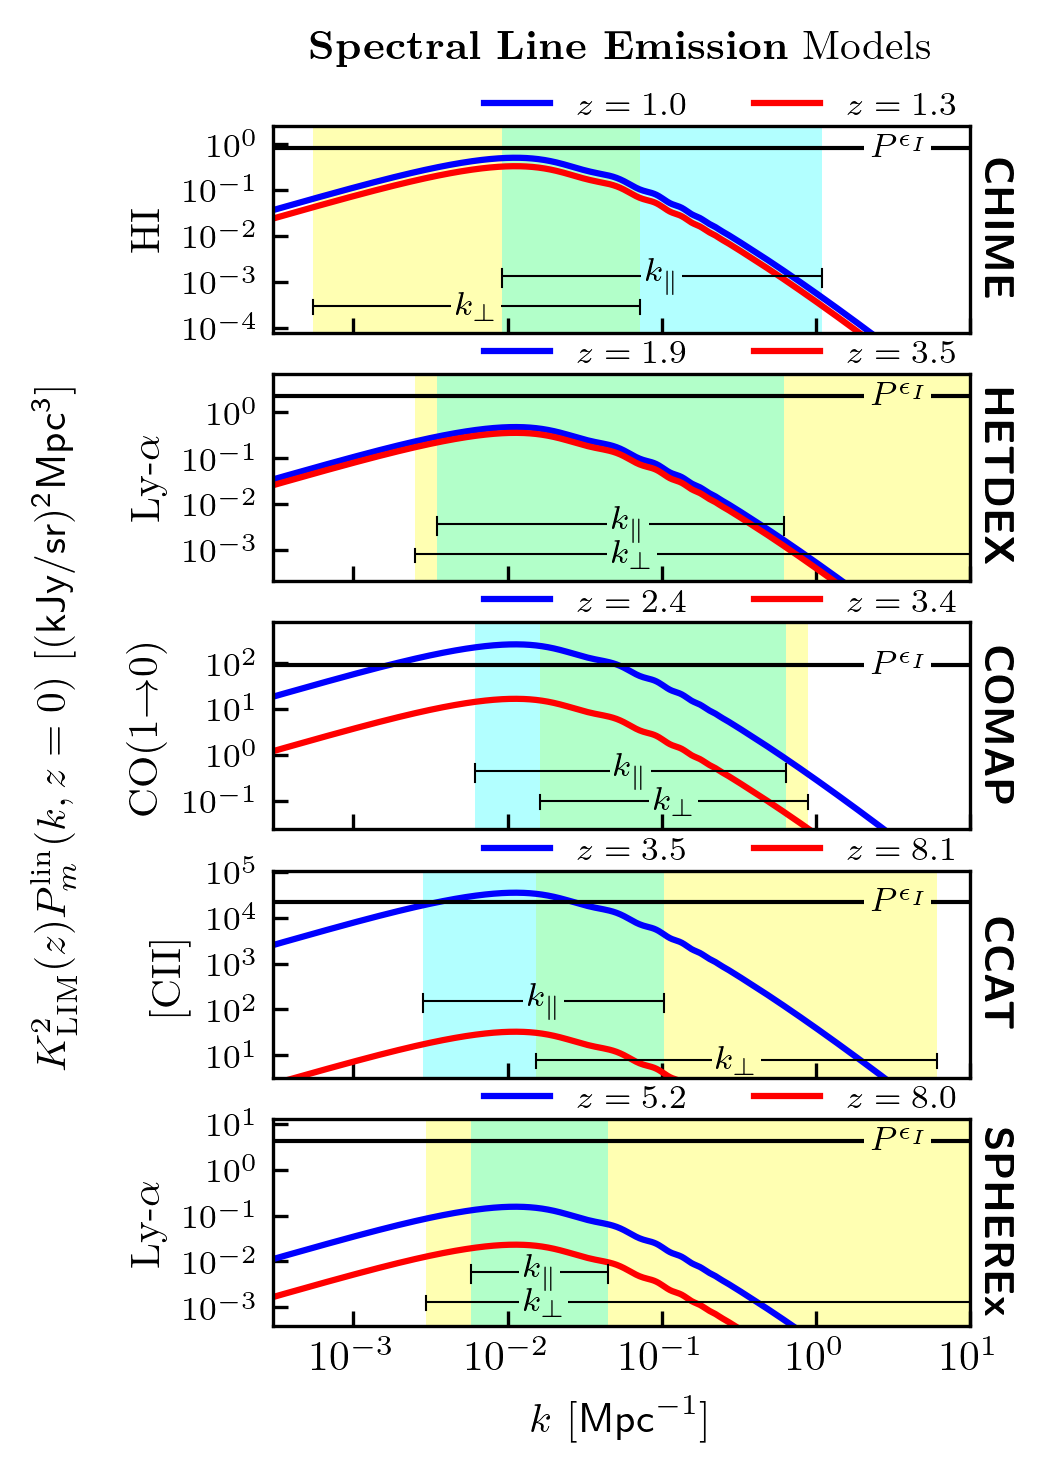

In [18]:
fig, axs = plt.subplots(nrows = len(experiments), ncols = 1, sharex = True, 
                       figsize=(3, 5.3),
                       facecolor='w', dpi=300)

for i,experiment in enumerate(e_order):
        
    ax = axs[i]
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)

    #load configuration of experiment
    zmin = experiments[experiment]['zmin']
    zmax = experiments[experiment]['zmax']
    zcentral = (zmin + zmax)/2

    line_str = experiments[experiment]['line_str']

    chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
    chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
    chicentral = ccl.comoving_angular_distance(cosmo, 1/(1+zcentral))



    #kperp min max with central chi
    ell_fundamental = np.sqrt((2*np.pi)**2 / experiments[experiment]['Omega_field'].to(u.rad**2))
    ell_fundamental = np.array(ell_fundamental)

    ell_max_survey = np.sqrt((np.pi)**2 / experiments[experiment]['Omega_pix'].to(u.rad**2))
    ell_max_survey = np.array(ell_max_survey)

    kperp_min = ell_fundamental/chicentral #1/Mpc
    kperp_max = ell_max_survey/chicentral  #1/Mpc

    
    ax.fill_between([kperp_min, kperp_max], 
                     [0, 0], 
                     [1e100, 1e100], 
                     linewidth=0.0,
                     alpha = 0.3,
                     facecolor='yellow',)



    #kpar min max with resolving factor 
    R = experiments[experiment]['R']
    dchi_central = (1+zcentral) / R * f_dchidz(zcentral)

    kpar_fundamental = 2*np.pi/(chimax - chimin)
    kpar_max_survey = np.pi / dchi_central

    

    ax.fill_between([kpar_fundamental, kpar_max_survey], 
                     [0, 0], 
                     [1e100, 1e100], 
                     linewidth=0,
                     alpha = 0.3,
                     facecolor='cyan', )
    


    #plot P3D LIM
    ax.tick_params(axis='both', which='both', direction='in')

    if(line_str == 'Lya'):
        line_str = r'Ly-$\alpha$'
    if(line_str == 'CO'):
        line_str = r'CO'
    if(line_str == 'CII'):
        line_str = r'[CII]'

    idxs = [np.argmin(np.abs(zs - zmin)),
            np.argmin(np.abs(zs - zmax))]
    colors = ['b', 'r']

    for idx,c in zip(idxs, colors):
        z = zs[idx]
        ax.plot(k, (KIs[experiment][idx].to(u.kJy/u.sr))**2 * pk_lin, 
                 c = c,
                 label=r'$z=%.1f$'%(z))
#         ax.plot(k, (KIs[experiment][idx].to(u.kJy/u.sr))**2 * pk_nonlin, 
#                  c = c,
#                  ls='--')
    ax.set_yscale('log')
    ax.set_xscale('log')


    #instrumentla noise
    _, _b = Pei_dict[experiment]() 
    print(experiment)
    _b = np.array(_b.to((u.kJy/u.sr)**2 * u.Mpc**3)) 
    Pei = np.max(_b)



    #figure config
    leg = ax.legend(frameon=False, ncols = 2, 
                    bbox_to_anchor=(0., 0.96, 1., .5),
                    borderaxespad=0.,
                    loc = 'lower right',
                    bbox_transform=ax.transAxes,
                    fontsize = 8,)
    
    _etxt = experiment
    if(experiment == 'CCAT-prime'):
        _etxt = 'CCAT'
    ax.text(1.01, 0.5, r'\textsf{\textbf{%s}}'%(_etxt), 
            transform=ax.transAxes, 
            ha='left', va='center',
            fontsize=10,
            rotation=-90)
    
#     ax.text(1-0.015, 0.5, r'%s'%(line_str), 
#             transform=ax.transAxes, 
#             fontsize = 8,
#             rotation=-90,
#             ha='right', va='center',)
    ax.set_ylabel(line_str)
    
    xleft = 3e-4
    xright = 1e1
    plotted_idxs = np.where((k <= xright) & (k>=xleft))


    yhigh = 3*max(np.array(np.max((KIs[experiment][idxs[0]].to(u.kJy/u.sr))**2  * pk_lin[plotted_idxs])), Pei)
    ax.set_xlim(xleft, xright)
    ax.set_ylim(yhigh/2**15, yhigh)
    ax.yaxis.set_major_locator(mticker.LogLocator(numticks=999,))
    # ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs='all'))    
    
    
    _x = np.sqrt(kperp_min * kperp_max)
    _x2 = np.sqrt(kpar_fundamental * kpar_max_survey)

    _ha = 'center'
    if(experiment == 'HETDEX' or experiment == 'SPHEREx'):
        _ha = 'left'
        
        
    if(experiment == 'HETDEX'):
        _x = _x2
        
        
    if(experiment == 'SPHEREx'):
        _x2 = 1.25e-2
        _x = _x2

    hline_text(x = _x, 
               y=kper_ys[i],  text=r'$k_\perp$',
              color='k', fontsize=8, linestyle='-', ax=ax, 
              left = kperp_min, right=kperp_max,
              ha = _ha, lw=0.5, pad=0.005)

    
    hline_text(x = _x2, 
               y=kpar_ys[i],  text=r'$k_\parallel$',
              color='k', fontsize=8, linestyle='-', ax=ax, 
              left = kpar_fundamental, right=kpar_max_survey,
              ha = _ha, lw=0.5, pad=0.005)




#     hline_text(x = 5e1, y=Pei,  text=r'{\sf Instrumental Noise Power} $P^{\epsilon_I}$',
#               color='k', fontsize=10, linestyle='-', ax=ax)

    hline_text(x = 5, y=Pei,  text=r'$P^{\epsilon_I}$',
              color='k', fontsize=8, linestyle='-', ax=ax, bookends=False)
    
    ax.tick_params(axis='y', labelsize=8)    
    ax.tick_params(
        axis='x',
        which='minor',
        bottom=False,)
    
axs[-1].set_xlabel(r'$k\ [{\sf Mpc}^{-1}]$', )
axs[2].set_ylabel(r'$K_{\rm LIM}^2(z)P_m^{\rm lin}(k, z=0)\ [{\sf (kJy/sr)^2 Mpc^3}]$'+'\n\n'+r'CO(1$\rightarrow$0)')


# plt.subplots_adjust(wspace=0, hspace=0)
# axs[0].set_title(r'\textbf{Cosmological Signal}/{\sf Instrumental Noise} Models for LIM'+'\n',
#                 fontsize=11,)
axs[0].set_title(r'\textbf{Spectral Line Emission} Models'+'\n',
                fontsize=10,)

plt.savefig('figures/012.002.line-models.pdf', bbox_inches='tight')